<a href="https://colab.research.google.com/github/choarauc/prophet/blob/main/cerial_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import random
from bokeh.io import  push_notebook,output_notebook, show
output_notebook() 
import seaborn as sns
from fbprophet import Prophet
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import files 
uploaded = files.upload()

Saving rice_wheat_corn_prices.csv to rice_wheat_corn_prices.csv


In [22]:
df = pd.read_csv('rice_wheat_corn_prices.csv')
df

,Year,Month,Price_wheat_ton,Price_rice_ton,Price_corn_ton,Inflation_rate,Price_wheat_ton_infl,Price_rice_ton_infl,Price_corn_ton_infl
0,1992,Feb,170.12,278.25,113.62,89.59,322.53,527.53,215.41
1,1992,Mar,161.44,277.20,117.00,89.59,306.07,525.54,221.82
2,1992,Apr,153.07,278.00,108.52,89.59,290.21,527.06,205.74
3,1992,May,139.72,274.00,109.64,89.59,264.90,519.48,207.87
4,1992,Jun,140.36,268.80,110.90,89.59,266.11,509.62,210.26
...,...,...,...,...,...,...,...,...,...
355,2021,Sep,263.60,400.00,235.62,-1.29,260.20,394.84,232.58
356,2021,Oct,334.50,401.00,239.65,-1.29,330.18,395.83,236.56
357,2021,Nov,327.82,400.00,248.72,-1.29,323.59,394.84,245.51
358,2021,Dec,332.06,400.00,264.54,-1.29,327.78,394.84,261.13


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  360 non-null    int64  
 1   Month                 360 non-null    object 
 2   Price_wheat_ton       359 non-null    float64
 3   Price_rice_ton        360 non-null    float64
 4   Price_corn_ton        360 non-null    float64
 5   Inflation_rate        359 non-null    float64
 6   Price_wheat_ton_infl  359 non-null    float64
 7   Price_rice_ton_infl   359 non-null    float64
 8   Price_corn_ton_infl   359 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 25.4+ KB


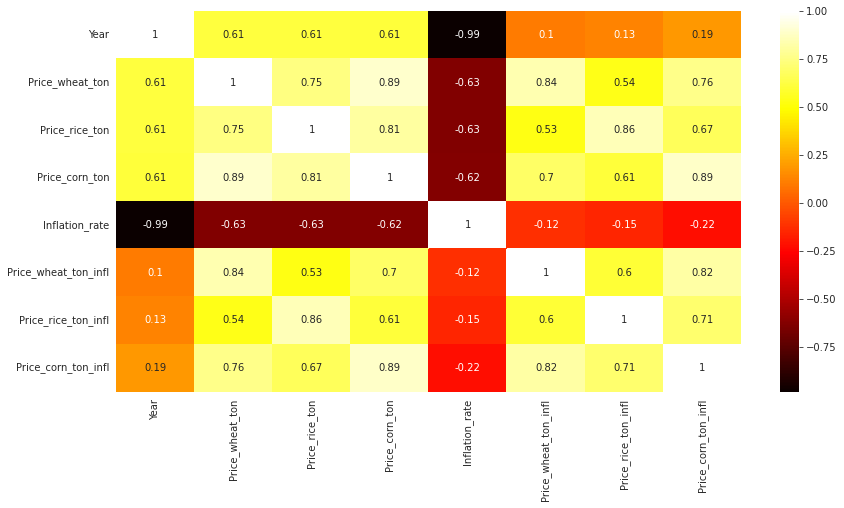

In [44]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True, cmap="hot")
plt.show()

In [25]:
# Cette fonction permet de déterminer les variables avec des valeurs manquantes
def valeur_manquante(df):
    flag=0
    for col in df.columns:
            if df[col].isna().sum() > 0:
                flag=1
                print(f'"{col}": {df[col].isna().sum()} valeur(s) manquante(s)')
    if flag==0:
        print("Le dataset ne contient plus de valeurs manquantes.")

valeur_manquante(df)

"Price_wheat_ton": 1 valeur(s) manquante(s)
"Inflation_rate": 1 valeur(s) manquante(s)
"Price_wheat_ton_infl": 1 valeur(s) manquante(s)
"Price_rice_ton_infl": 1 valeur(s) manquante(s)
"Price_corn_ton_infl": 1 valeur(s) manquante(s)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

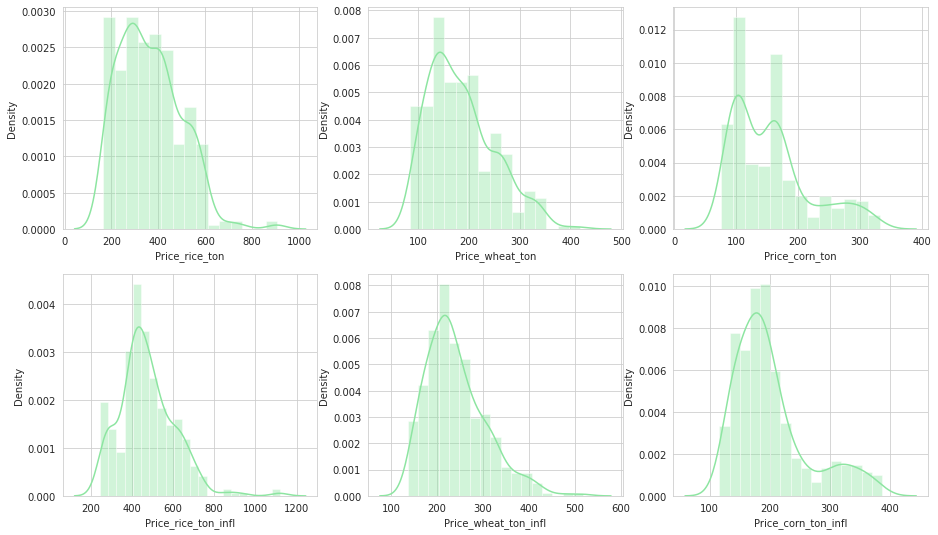

In [43]:
col = ["Price_rice_ton", "Price_wheat_ton", "Price_corn_ton",
       "Price_rice_ton_infl", "Price_wheat_ton_infl", "Price_corn_ton_infl"]

plt.figure(figsize=(15.5,9))
for (x,y) in zip(col,range(len(col))):
    plt.subplot(2,3,y+1)
    sns.distplot(df[x], color="g")
plt.show();

Wheat Price Analyz for All Years Except 2022


In [27]:
#We erase the 2022 in data. Because 2022 values is a another column (Price_wheat_ton_infl)
#If we dont filter [:30] 2022 count will a '0' value 
dataAllYears = df.groupby(['Year'])['Price_wheat_ton'].sum().reset_index()

#But this situation
dataExcept2022Wheat = df.groupby(['Year'])['Price_wheat_ton'].sum().reset_index()[:30]
dataExcept2022Wheat

,Year,Price_wheat_ton
0,1992,1574.44
1,1993,1617.29
2,1994,1662.66
3,1995,2008.30
4,1996,2249.03
5,1997,1723.78
6,1998,1338.18
7,1999,1155.34
8,2000,1186.97
9,2001,1292.69


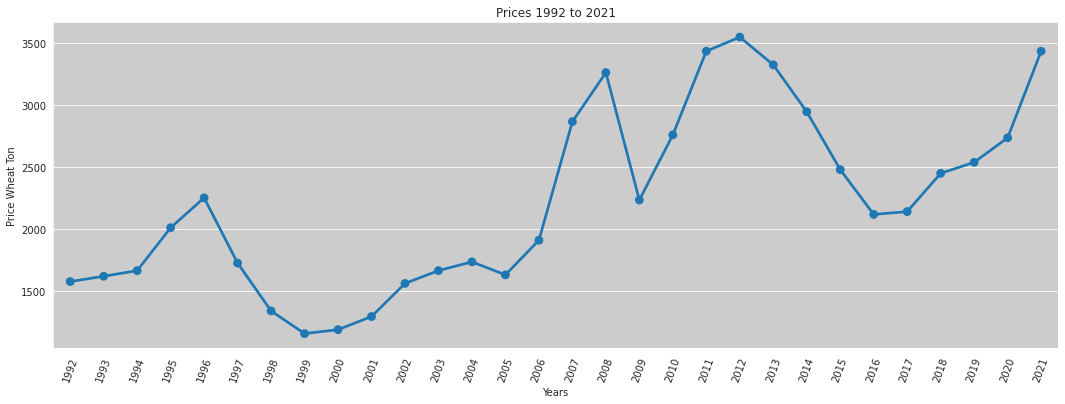

In [28]:
plt.figure(figsize=(18,6))
sns.set_style("darkgrid", {"axes.facecolor": ".8"})
ax = sns.pointplot(x='Year',
                y='Price_wheat_ton',
                data = dataExcept2022Wheat,
                alpha=0.2)

plt.xticks(rotation = 70)
plt.xlabel('Years')
plt.ylabel('Price Wheat Ton')
plt.title('Prices 1992 to 2021')
plt.show()

Rice Price Analyz for All Years Except 2022

In [30]:
dataExcept2022Rice = df.groupby(['Year'])['Price_rice_ton'].sum().reset_index()[:30]
dataExcept2022Rice

,Year,Price_rice_ton
0,1992,2941.40
1,1993,2824.95
2,1994,3211.10
3,1995,3851.50
4,1996,4066.50
5,1997,3642.12
6,1998,3649.90
7,1999,2981.00
8,2000,2428.75
9,2001,2074.06


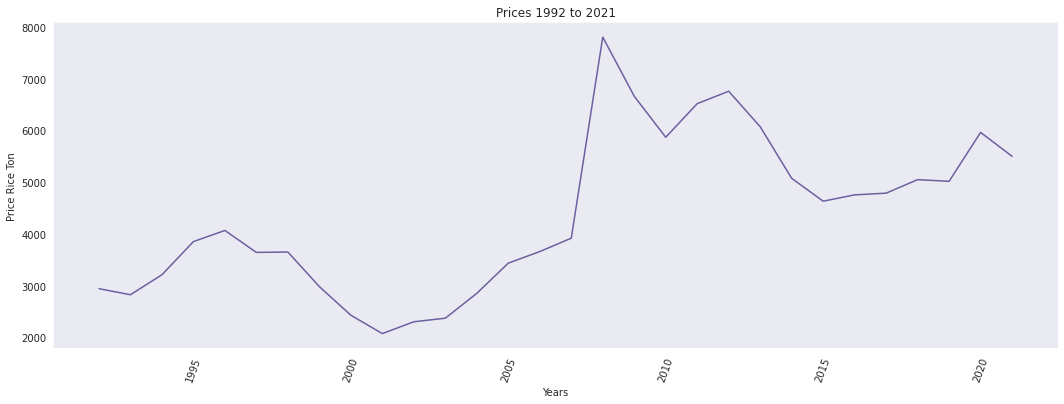

In [31]:
plt.figure(figsize=(18,6))
sns.set_style("dark")
sns.lineplot(x='Year',
                y='Price_rice_ton',
                data = dataExcept2022Rice,
                color='#483d8b',
                alpha=0.8,
                )
plt.xticks(rotation = 70)
plt.xlabel('Years')
plt.ylabel('Price Rice Ton')
plt.title('Prices 1992 to 2021')
plt.show()

Corn Price Analyz for All Years Except 2022

In [32]:
dataExcept2022Corn = df.groupby(['Year'])['Price_corn_ton'].sum().reset_index()[:30]

dataExcept2022Corn

,Year,Price_corn_ton
0,1992,1141.64
1,1993,1225.08
2,1994,1290.60
3,1995,1481.85
4,1996,1989.71
5,1997,1405.10
6,1998,1223.84
7,1999,1082.60
8,2000,1062.41
9,2001,1075.69


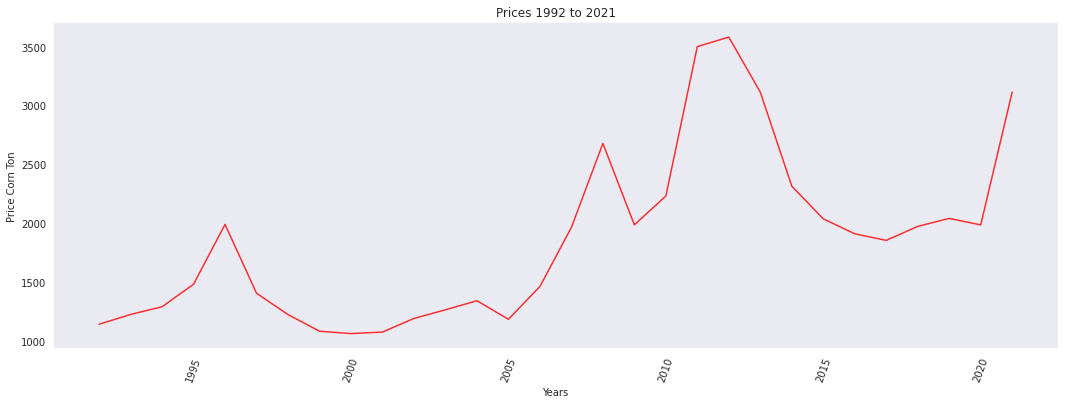

In [33]:
plt.figure(figsize=(18,6))
sns.set_style("dark")
sns.lineplot(x='Year',
                y='Price_corn_ton',
                data = dataExcept2022Corn,
                color='r',
                alpha=0.8,
                )
plt.xticks(rotation = 70)
plt.xlabel('Years')
plt.ylabel('Price Corn Ton')
plt.title('Prices 1992 to 2021')
plt.show()

Price Analyz For 2022

In [34]:
data2022Prizes = df.groupby(['Month'])[['Price_wheat_ton_infl','Price_rice_ton_infl','Price_corn_ton_infl']].sum().reset_index()[:30]

In [35]:
data2022Prizes

,Month,Price_wheat_ton_infl,Price_rice_ton_infl,Price_corn_ton_infl
0,Apr,7261.11,14447.62,6141.70
1,Aug,6966.90,14094.01,5914.28
2,Dec,7615.57,14141.54,5980.42
3,Feb,7462.30,14500.21,6093.63
4,Jan,7142.14,13918.13,5776.44
5,Jul,6869.20,14304.46,6088.98
6,Jun,6811.90,14372.61,6229.82
7,Mar,7392.65,14288.06,6180.78
8,May,7062.45,14395.96,6215.71
9,Nov,7557.20,13890.26,5928.03


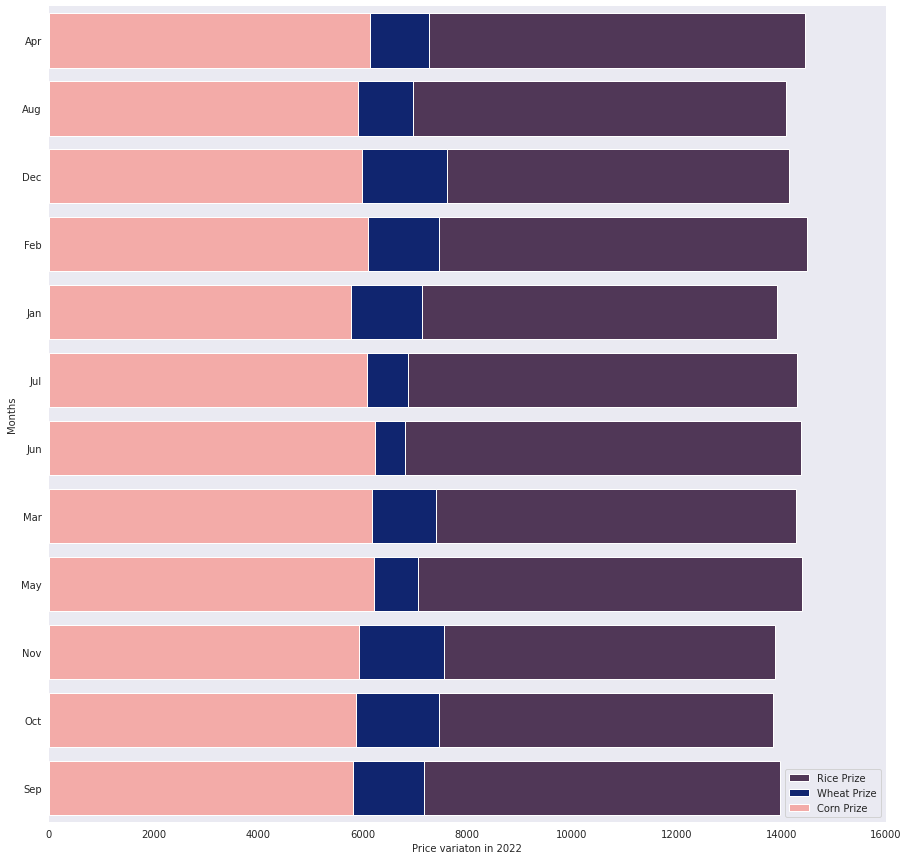

In [36]:
f, ax = plt.subplots(figsize=(15, 15))

sns.set_color_codes("muted")
sns.barplot(x='Price_rice_ton_infl', y='Month', data=data2022Prizes,
            label='Rice Prize', color='#53325c')

sns.set_color_codes("dark")
sns.barplot(x='Price_wheat_ton_infl', y='Month', data=data2022Prizes,
            label='Wheat Prize', color='b')

sns.set_color_codes("pastel")
sns.barplot(x='Price_corn_ton_infl', y='Month', data=data2022Prizes,
            label='Corn Prize', color='r')


ax.legend(loc="lower right")
ax.set(xlim=(0, 16000), ylabel="Months",
       xlabel="Price variaton in 2022")
sns.despine(left=True, bottom=True)

Price Compare 1992 and 2022


In [38]:
# Sum 1992 prize values
prizes1992 = df.groupby(['Year'])[['Price_wheat_ton','Price_rice_ton','Price_corn_ton']].sum().reset_index()[:1]
prizes1992 

,Year,Price_wheat_ton,Price_rice_ton,Price_corn_ton
0,1992,1574.44,2941.4,1141.64


In [39]:
# Sum 2022 prize values
data2022Prizes.sum()

Month                   AprAugDecFebJanJulJunMarMayNovOctSep
Price_wheat_ton_infl                                86779.91
Price_rice_ton_infl                                170179.78
Price_corn_ton_infl                                 72234.78
dtype: object

In [40]:
data1992and2022 = {'Year':[1992,2022],
                   'Price_wheat_ton' : [1574.44,86779.91],
                   'Price_rice_ton' : [2941.4,170179.7],
                   'Price_corn_ton' : [1141.64,72234.78],
                  }

data1992and2022Df = pd.DataFrame(data=data1992and2022)

<Figure size 864x864 with 0 Axes>

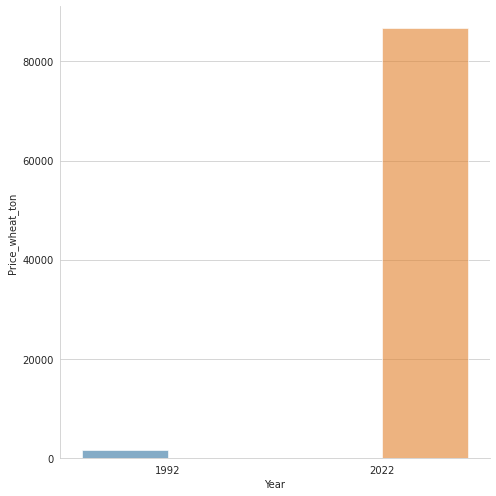

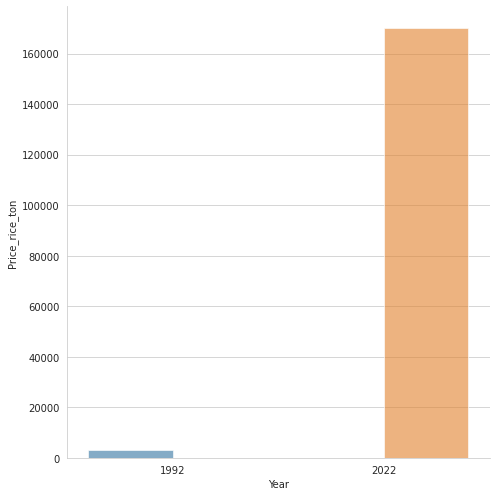

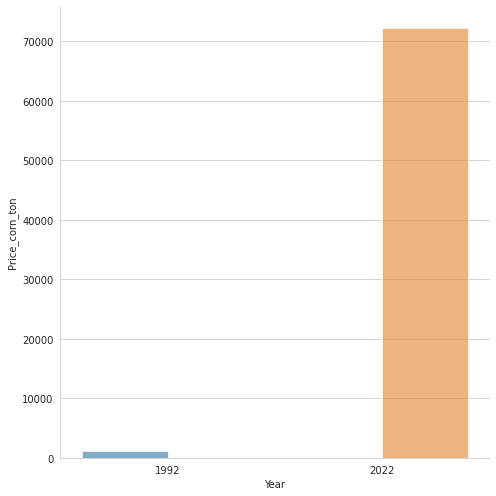

In [41]:
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
g = sns.catplot(data=data1992and2022Df, 
                kind="bar",
                hue='Year',
                x='Year',
                y='Price_wheat_ton',
                alpha=.6, height=7)

g = sns.catplot(data=data1992and2022Df, 
                kind="bar",
                hue='Year',
                x='Year',
                y='Price_rice_ton',
                alpha=.6, height=7)

g = sns.catplot(data=data1992and2022Df, 
                kind="bar",
                hue='Year',
                x='Year',
                y='Price_corn_ton',
                alpha=.6, height=7)